In [44]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [45]:
def rest(a,b):
    return [item for item in a if item not in set(b)]

def inter(a,b):
    return [item for item in a if item in set(b)]

In [46]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [47]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.74s)
creating index...
index created!


In [48]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms_sc = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms_sc)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor appliance electronic sports accessory animal indoor food person kitchen vehicle furniture


In [49]:
# clases que se quieren  
cat_list = ['person','vase','tv','chair','couch','potted plant','bed','dining table','microwave','oven','sink','refrigerator','toilet','glass','keyboard','remote','remote','cup']
# clases con todo menos personas
cat_list_np =  rest(nms,['person'])
# clases que no se quieren
cat_list_c =  rest(nms,cat_list)

In [53]:
# clases que se quieren  
catIds_todas = coco.getCatIds(catNms=nms);
# clases que no se quieren
catIds_c = coco.getCatIds(catNms=cat_list_c);
# clases con todo menos personas
catIds_np = coco.getCatIds(catNms=cat_list_np);

imgIds_todas = []
imgIds_c = []
imgIds_np = []

# se obtienen todas las imagenes
for Id in catIds_todas:
    imgIds_todas = imgIds_todas + coco.getImgIds(catIds=Id)
imgIds_todas = list(dict.fromkeys(imgIds_todas))

#se obtienen imagenes con elementos que no se quieren 
for Id in catIds_c:
    imgIds_c = imgIds_c + coco.getImgIds(catIds=Id)
imgIds_c = list(dict.fromkeys(imgIds_c))

# se obtienen imagenes donde no salen personas solas
for Id in catIds_np:
    imgIds_np = imgIds_np + coco.getImgIds(catIds=Id)
imgIds_np = list(dict.fromkeys(imgIds_np))
    
# Filtramos las imagenes totales menos las que no queremos 
imgIds = rest(imgIds_todas,imgIds_c)
imgIds = inter(imgIds,imgIds_np)

In [54]:
print("imagenes totales: ", len(imgIds_todas))
print("imagenes filtradas: ", len(imgIds_todas)-len(imgIds))
print("imagenes resultantes: ", len(imgIds))

imagenes totales:  4952
imagenes filtradas:  4644
imagenes resultantes:  308


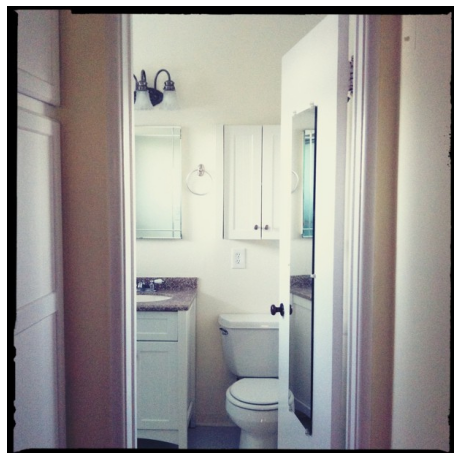

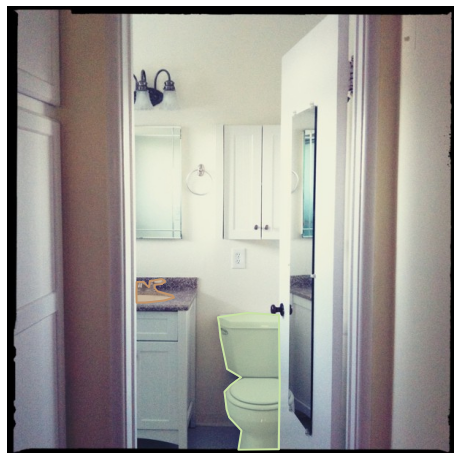

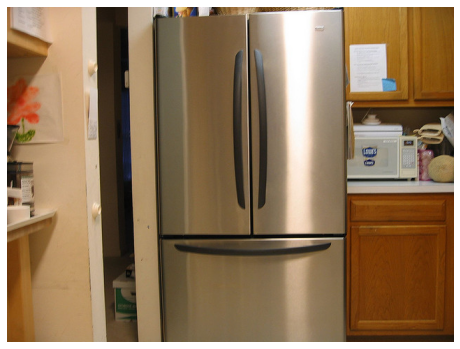

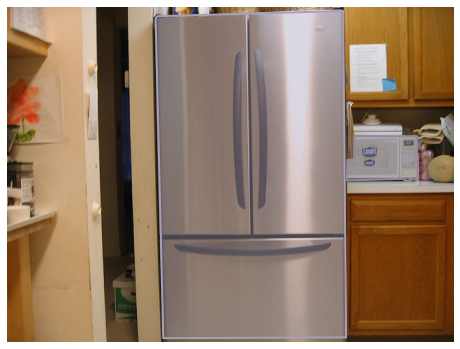

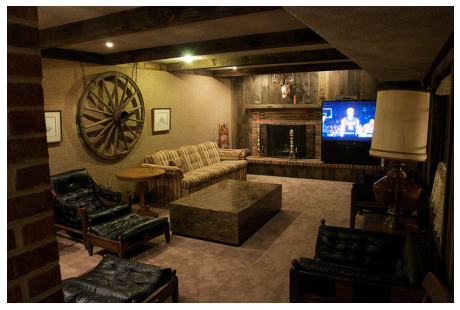

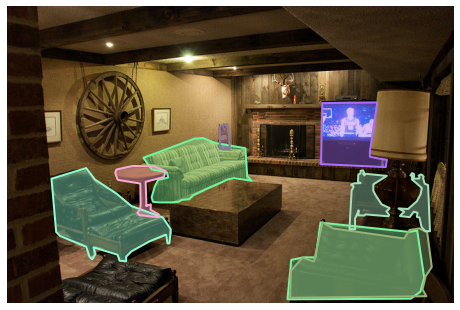

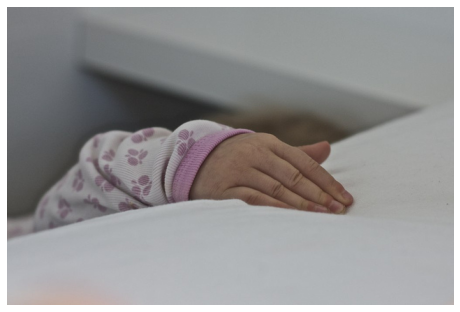

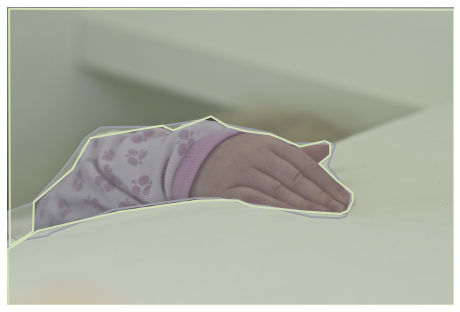

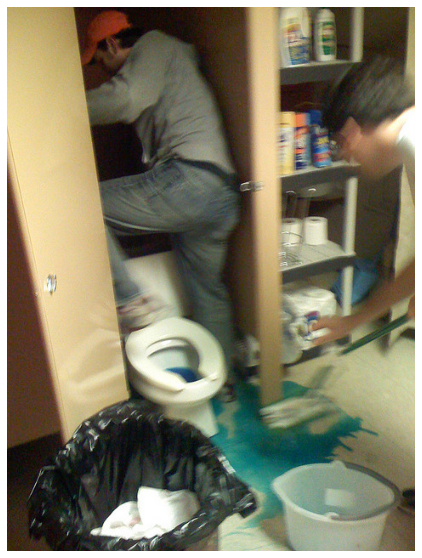

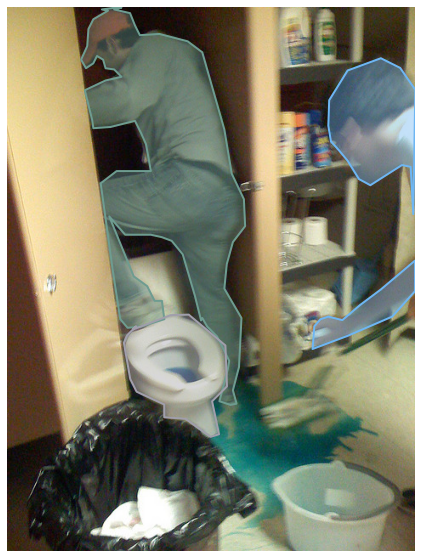

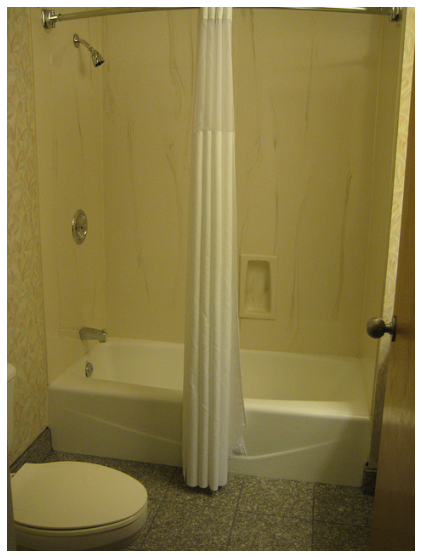

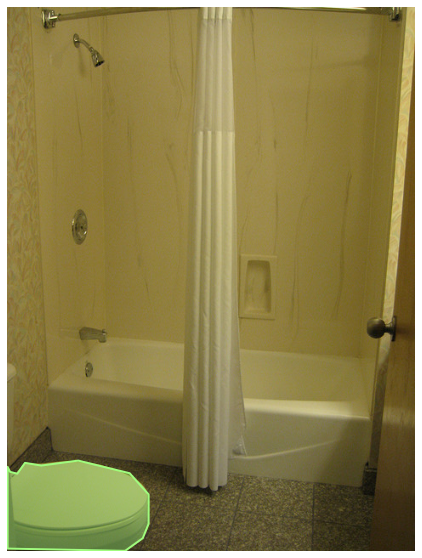

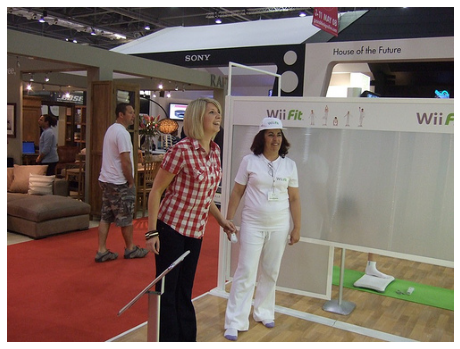

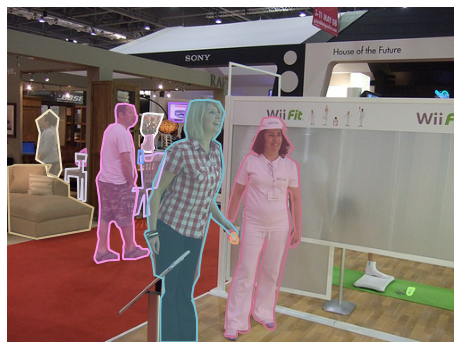

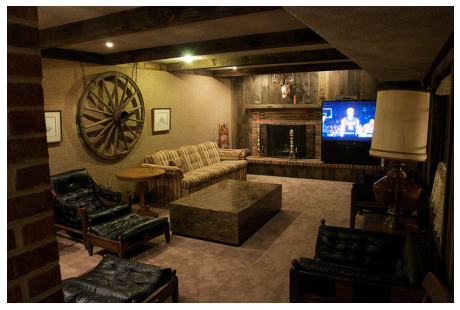

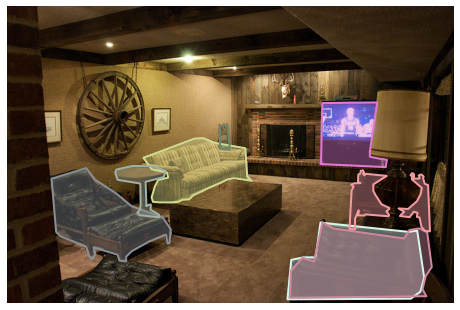

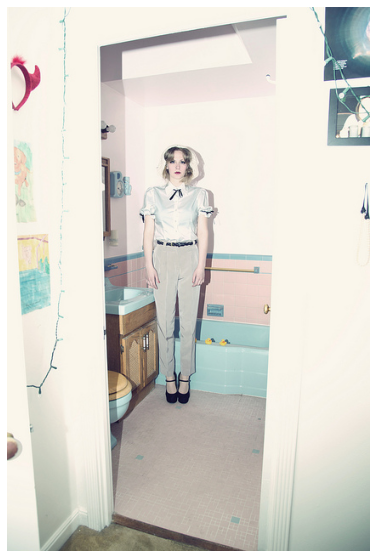

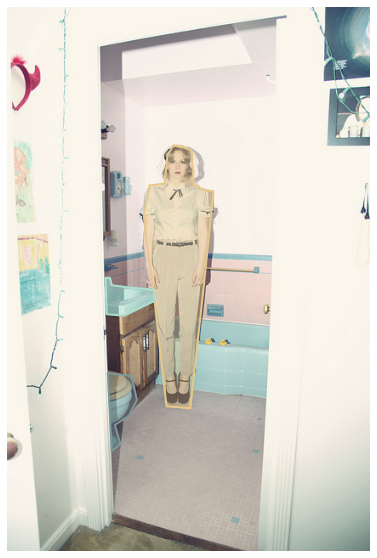

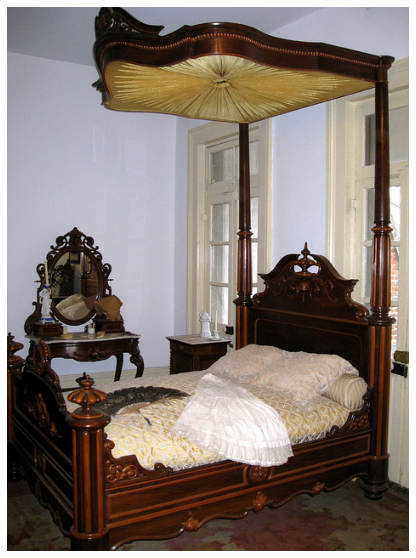

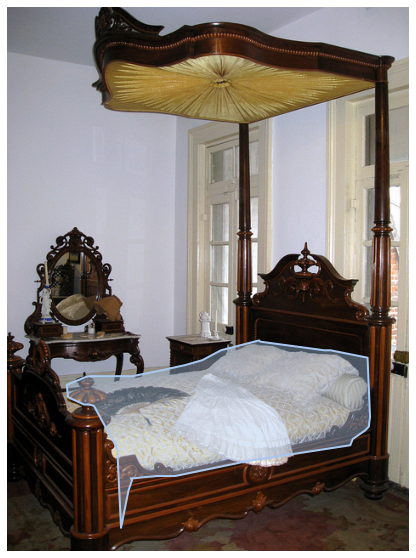

In [56]:
for i in range(10):
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    # imagen
    I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.imshow(I)
    plt.show()
    # segmentación
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds_todas, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    plt.show()